# <font color=orange> Section 1 </font>
# Traveling Salesman Problem (TSP)
## The travelling salesman problem asks the following question: "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?" It is an NP-hard problem in combinatorial optimization, important in theoretical computer science and operations research.
***
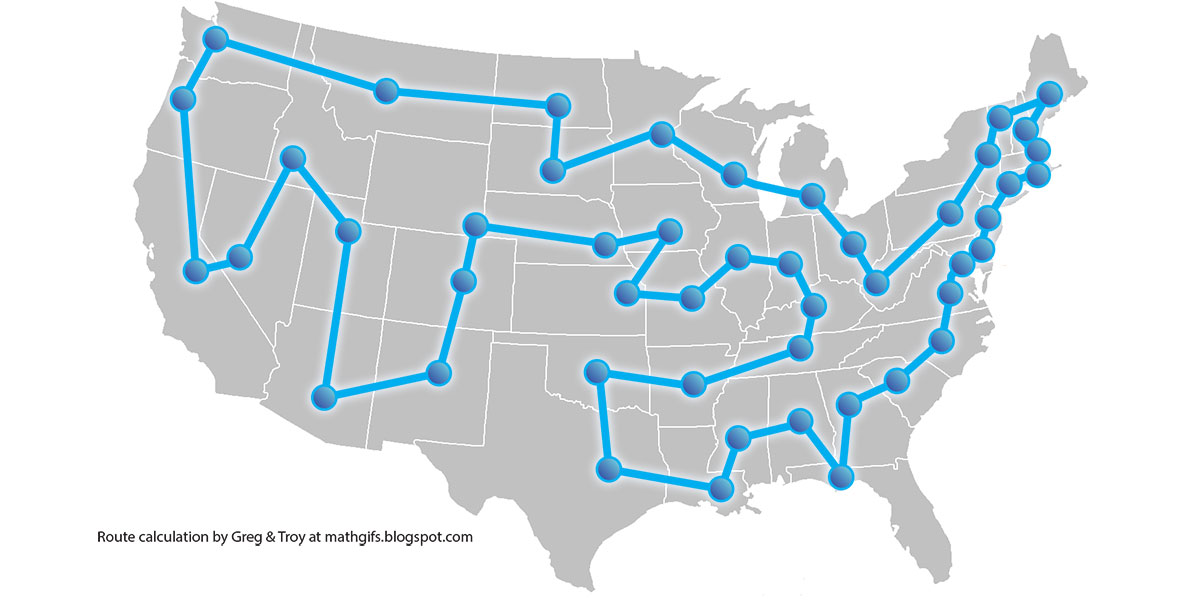


### Pratical Example:
UPS ORION https://www.youtube.com/watch?v=CsJRsToDI8w
***

## Mathematicians began to try to abstract this problem and design different algorithms to solve this classic mathematical problem. It is a common practice to use a string of numbers to represent the order in which each city is visited. Some people call each of the solution a chromosome.
## The number zero represents the starting point and the end point.
## Each other number represents each city or customer location that needs to be visited.
## By calculating the total distance of each solution, the quality of each solution can be compared.
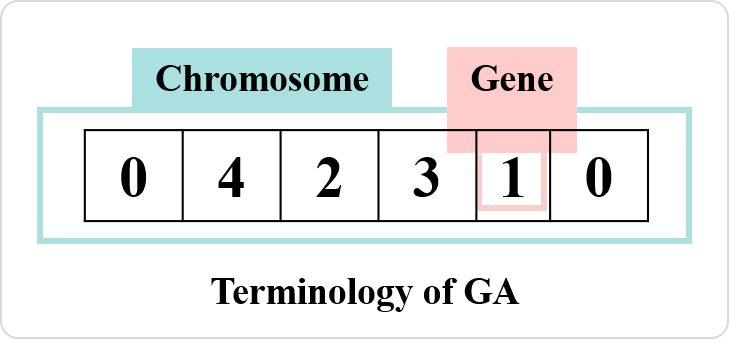

## Step1: Problem Setup Function

In [ ]:
# impot madules and setup parameters
import random as rd 
import matplotlib.pyplot as plt
service_radius=5000
number_of_customers=100

In [ ]:
#Setup the random locations of all customers and draw the picture

def setup ():
    plt.rcParams["figure.figsize"] = (10,10)
    x=[0] #put deport (start point) at the middle of service area
    y=[0]   
    for i in range (1,number_of_customers+1):
        x.append(int(rd.uniform(-service_radius,service_radius)))
        y.append(int(rd.uniform(-service_radius,service_radius)))
    return(x,y)

def show (x,y):
    plt.scatter(x[0],y[0], s=100, c='r')     
    for i in range (1,number_of_customers+1):
        plt.scatter(x[i],y[i], s=50, c='b')    


In [ ]:
# Test
x,y=setup()
show (x,y)
print(x,y)

## Step 2: Visualize Route Function

In [ ]:
#function for visualizing route
def visualize (route):
    show (x,y)
    for i in range (len(route)-1):
        plt.plot([x[route[i]],x[route[i+1]]],[y[route[i]],y[route[i+1]]],"Gray")         
    plt.show()

In [ ]:
#Test with a randomly decided route
x,y=setup()
route=[x for x in range(1,number_of_customers+1)]
rd.shuffle(route)
route.insert(0,0)
route.append(0)
visualize(route)
print(route)

## Step 3:Objective Function

In [ ]:
#The Objective function which calculats the Manhattan distance of the inputted route
def objective(route):
    total_distance=0
    for i in range(len(route)-1):
        #print(route[i],"->", route[i+1],"distance:",abs(x[route[i]]-x[route[i+1]])+abs(y[route[i]]-y[route[i+1]]))
        total_distance+=abs(x[route[i]]-x[route[i+1]])+abs(y[route[i]]-y[route[i+1]])
    return(total_distance)

In [ ]:
#Test
print(objective(route))
print(x,y)

## Step 4:Greedy Algorithm

In [ ]:
def greedy():
    result=[0,0]
    for i in range (1,number_of_customers+1):
        min_cost=999999999
        for j in range(1,len(result)):
            temp=result.copy()
            temp.insert(j,i)
            if objective(temp)<min_cost:
                min_cost=objective(temp)
                best_location=j
        result.insert(best_location,i)
    return(result)

In [ ]:
#Test
result=greedy()
print(result, objective(result))
visualize (result)

# Greedy Algorithm for TSP (finished version)

In [ ]:
import random as rd 
import matplotlib.pyplot as plt
service_radius=5000
number_of_customers=500

def setup ():
    plt.rcParams["figure.figsize"] = (10,10)
    x=[0] #put deport (start point) at the middle of service area
    y=[0]   
    for i in range (1,number_of_customers+1):
        x.append(int(rd.uniform(-service_radius,service_radius)))
        y.append(int(rd.uniform(-service_radius,service_radius)))
    return(x,y)

def show (x,y):
    plt.scatter(x[0],y[0], s=100, c='r')     
    for i in range (1,number_of_customers+1):
        plt.scatter(x[i],y[i], s=50, c='b')    
        
def visualize (route):
    show (x,y)
    for i in range (len(route)-1):
        plt.plot([x[route[i]],x[route[i+1]]],[y[route[i]],y[route[i+1]]],"Gray")         
    plt.show()
    
def objective(route):
    total_distance=0
    for i in range(len(route)-1):
        total_distance+=abs(x[route[i]]-x[route[i+1]])+abs(y[route[i]]-y[route[i+1]])
    return(total_distance)

def greedy():
    result=[0,0]
    for i in range (1,number_of_customers+1):
        min_cost=999999999
        for j in range(1,len(result)):
            temp=result.copy()
            temp.insert(j,i)
            if objective(temp)<min_cost:
                min_cost=objective(temp)
                best_location=j
        result.insert(best_location,i)
    return(result)

x,y=setup()
result=greedy()
visualize(result)


# <font color=red>In-Class Exercise (100 points)</font>
# If using more than 1 trucks to delivery packages to customers, how would you modify the greedy algorithm? 

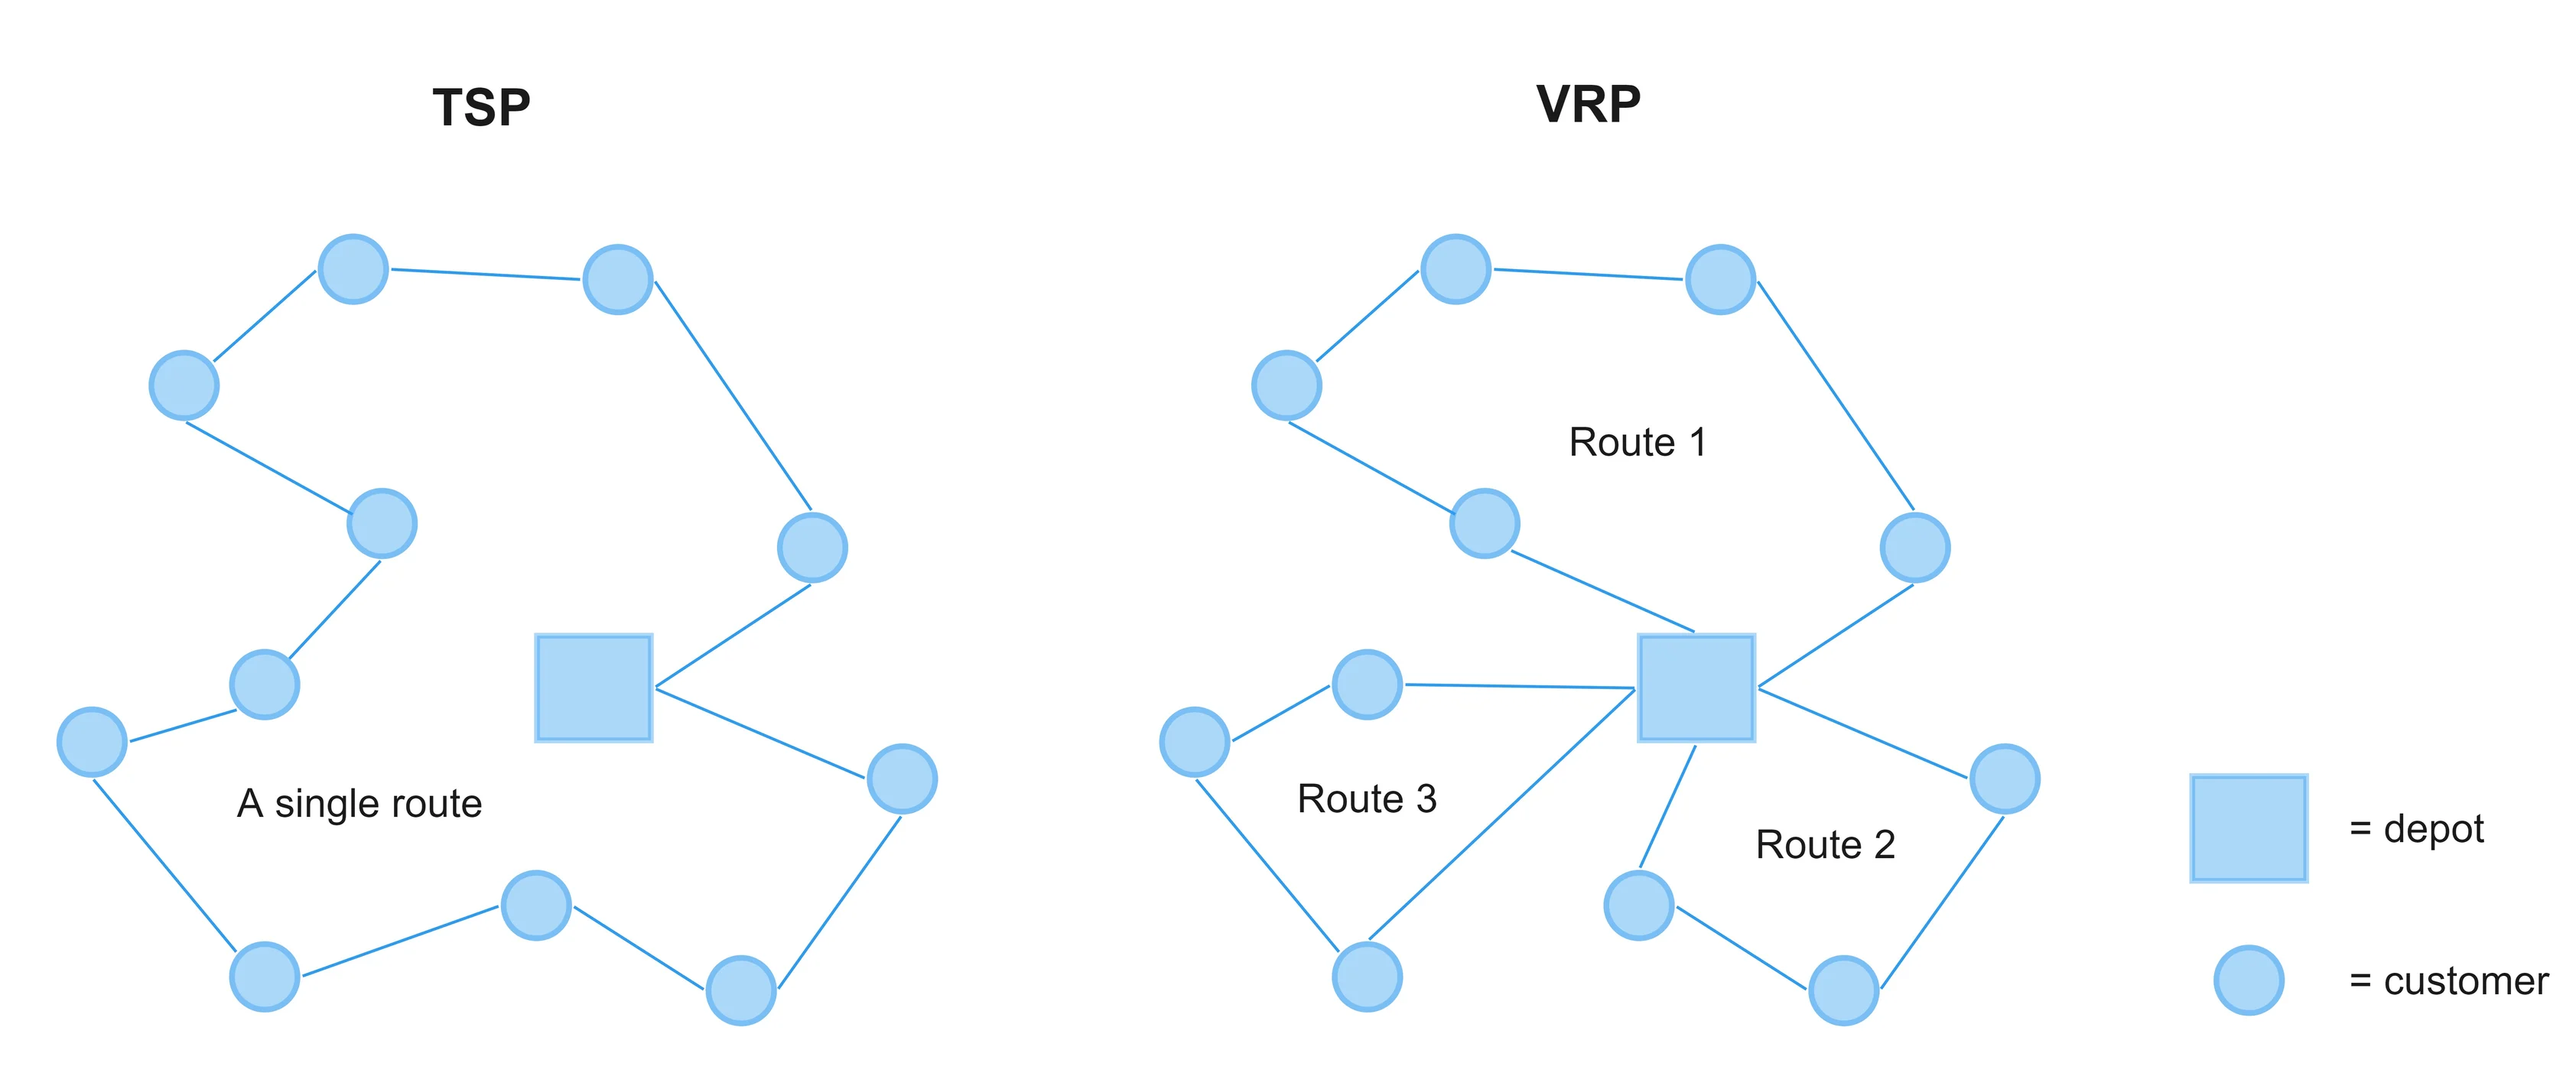


Initial route: [0, 1, 0, 2, 0, 3, 0]
Final result: [0, 6, 14, 15, 9, 3, 1, 1, 5, 17, 12, 18, 11, 20, 7, 0, 4, 16, 2, 2, 8, 13, 0, 10, 3, 19, 0]


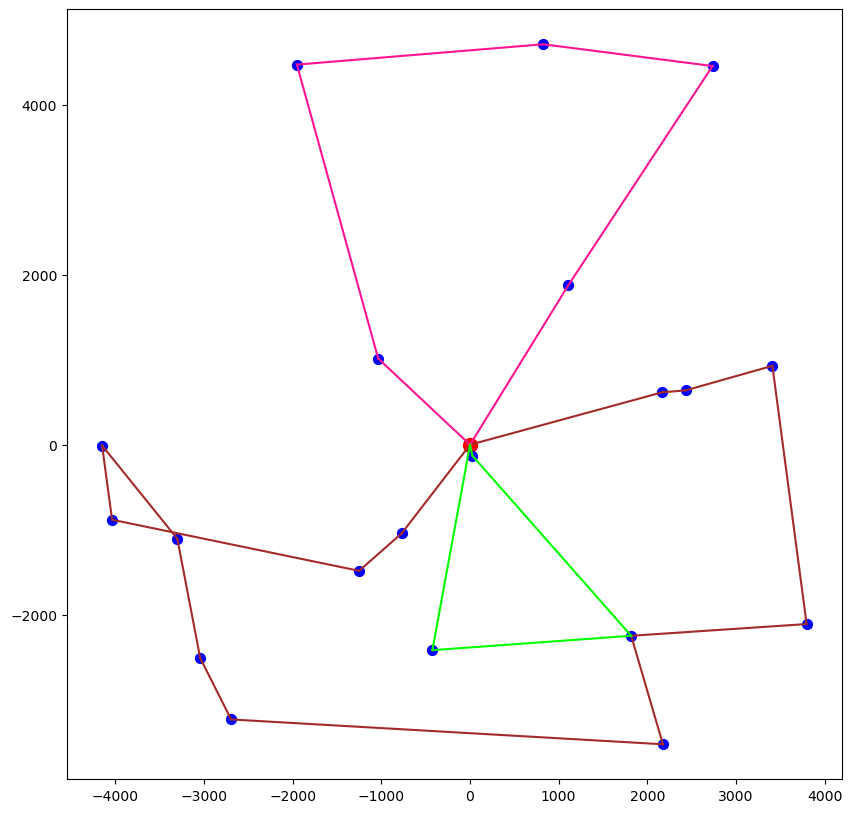

In [40]:
# Reference Solution

import random as rd 
import matplotlib.pyplot as plt
service_radius=5000
number_of_customers=20
number_of_trucks=3

def setup ():
    plt.rcParams["figure.figsize"] = (10,10)
    x=[0] #put deport (start point) at the middle of service area
    y=[0]   
    for i in range (1,number_of_customers+1):
        x.append(int(rd.uniform(-service_radius,service_radius)))
        y.append(int(rd.uniform(-service_radius,service_radius)))
    return(x,y)

def show (x,y):
    plt.scatter(x[0],y[0], s=100, c='r')     
    for i in range (1,number_of_customers+1):
        plt.scatter(x[i],y[i], s=50, c='b')    
        
def visualize(route):
    show (x,y)
    color=['blueviolet','brown','deeppink','lime','orange','aqua','Gray','red','c','purple']
    j=0
    for i in range (len(route)-1):
        if route[i]==0:
            j+=1
        if j>=len(color):
            j=0        
        plt.plot([x[route[i]],x[route[i+1]]],[y[route[i]],y[route[i+1]]],color[j]) 
    plt.show()
    
def objective(route):
    total_distance=0
    for i in range(len(route)-1):
        total_distance+=abs(x[route[i]]-x[route[i+1]])+abs(y[route[i]]-y[route[i+1]])
    return(total_distance)

def greedy(): 
    
    # assign one initial customers to each truck and add "0" to separate each truck's route
    result=[0]
    for i in range(1,number_of_trucks+1):
        result.append(i)
        result.append(0)
    print("Initial route:",result)
    
    for i in range (1,number_of_customers+1):
        min_cost=999999999
        for j in range(1,len(result)):
            temp=result.copy()
            temp.insert(j,i)
            if objective(temp)<min_cost:
                min_cost=objective(temp)
                best_location=j
        result.insert(best_location,i)
    return(result)

x,y=setup()
result=greedy()
print("Final result:", result)
visualize(result)


# <font color=orange> Section 2 </font>


## Warm up Practice 1: Maximum Units on a Truck (leetcode 1710)

#### You are assigned to put some amount of boxes onto one truck. You are given a 2D array boxTypes, where boxTypes[i] = [numberOfBoxes$_{i}$, numberOfUnitsPerBox$_{i}$]:

* numberOfBoxes$_{i}$ is the number of boxes of type i.

* numberOfUnitsPerBox$_{i}$ is the number of units in each box of the type i.

#### You are also given an integer truckSize, which is the maximum number of boxes that can be put on the truck. You can choose any boxes to put on the truck as long as the number of boxes does not exceed truckSize.

#### Return the maximum total number of units that can be put on the truck.


#### Example1:
* Input: boxTypes = [[1,3],[2,2],[3,1]], truckSize = 4
* Output: 8
* Explanation: There are:

  1 box of the first type that contains 3 units.
 
  2 boxes of the second type that contain 2 units each.
 
  3 boxes of the third type that contain 1 unit each.
 
   You can take all the boxes of the first and second types, and one box of the third type.
   
   The total number of units will be = (1 * 3) + (2 * 2) + (1 * 1) = 8.

#### Example2:
* Input: boxTypes = [[5,10],[2,5],[4,7],[3,9]], truckSize = 10
* Output: 91

In [14]:

def maximumUnits(boxTypes, truckSize) -> int:
    boxTypes = sorted(boxTypes, key = lambda i:i[1] , reverse=True)
    print(boxTypes)
    total = 0
    num=0
    for boxes in (boxTypes):
        for i in range (0,boxes[0]):
            if num<truckSize:
                total+=boxes[1]
                num+=1
            
    return total

maximumUnits([[5,10],[2,5],[4,7],[3,9]],10)


[[5, 10], [3, 9], [4, 7], [2, 5]]


91

## Warm up Practice 2: Maximum Bags With Full Capacity of Rocks (leetcode 2279)
#### You have n bags numbered from 0 to n - 1. You are given two 0-indexed integer arrays capacity and rocks. The ith bag can hold a maximum of capacity[i] rocks and currently contains rocks[i] rocks. You are also given an integer additionalRocks, the number of additional rocks you can place in any of the bags.

#### Return the maximum number of bags that could have full capacity after placing the additional rocks in some bags.

#### Example 1:

* Input: capacity = [2,3,4,5], rocks = [1,2,4,4], additionalRocks = 2
* Output: 3
* Explanation:

  Place 1 rock in bag 0 and 1 rock in bag 1.
  
  The number of rocks in each bag are now [2,3,4,4].
  
  Bags 0, 1, and 2 have full capacity.
  
  There are 3 bags at full capacity, so we return 3.
  
  It can be shown that it is not possible to have more than 3 bags at full capacity.
  
  Note that there may be other ways of placing the rocks that result in an answer of 3.

#### Example 2:

* Input: capacity = [10,2,2], rocks = [2,2,0], additionalRocks = 100
* Output: 3
* Explanation:
  
  Place 8 rocks in bag 0 and 2 rocks in bag 2.
  
  The number of rocks in each bag are now [10,2,2].
  
  Bags 0, 1, and 2 have full capacity.
  
  There are 3 bags at full capacity, so we return 3.
  
  It can be shown that it is not possible to have more than 3 bags at full capacity.
  
  Note that we did not use all of the additional rocks.

In [20]:
def maximumrock (capacity,rocks,additional):
    difference = []
    full=0
    for i in range(0,len(capacity)):
        difference.append(capacity[i]-rocks[i])
#     print(difference)
    difference = sorted(difference)

    for i in range(0,len(difference)):
        if difference[i]==0:
            full+=1
        elif additional>0 and additional-difference[i]>0:
            full+=1
            additional-=difference[i]
    return full

maximumrock([54,18,91,49,51,45,58,54,47,91,90,20,85,20,90,49,10,84,59,29,40,9,100,1,64,71,30,46,91],[14,13,16,44,8,20,51,15,46,76,51,20,77,13,14,35,6,34,34,13,3,8,1,1,61,5,2,15,18],77)
            

[0, 0, 1, 1, 3, 4, 5, 5, 7, 7, 8, 14, 15, 16, 25, 25, 28, 31, 37, 39, 39, 40, 43, 50, 66, 73, 75, 76, 99]


13

#  <font color=red> Mathematical Modeling for TSP</font>

# Miller–Tucker–Zemlin (MTZ) formulation
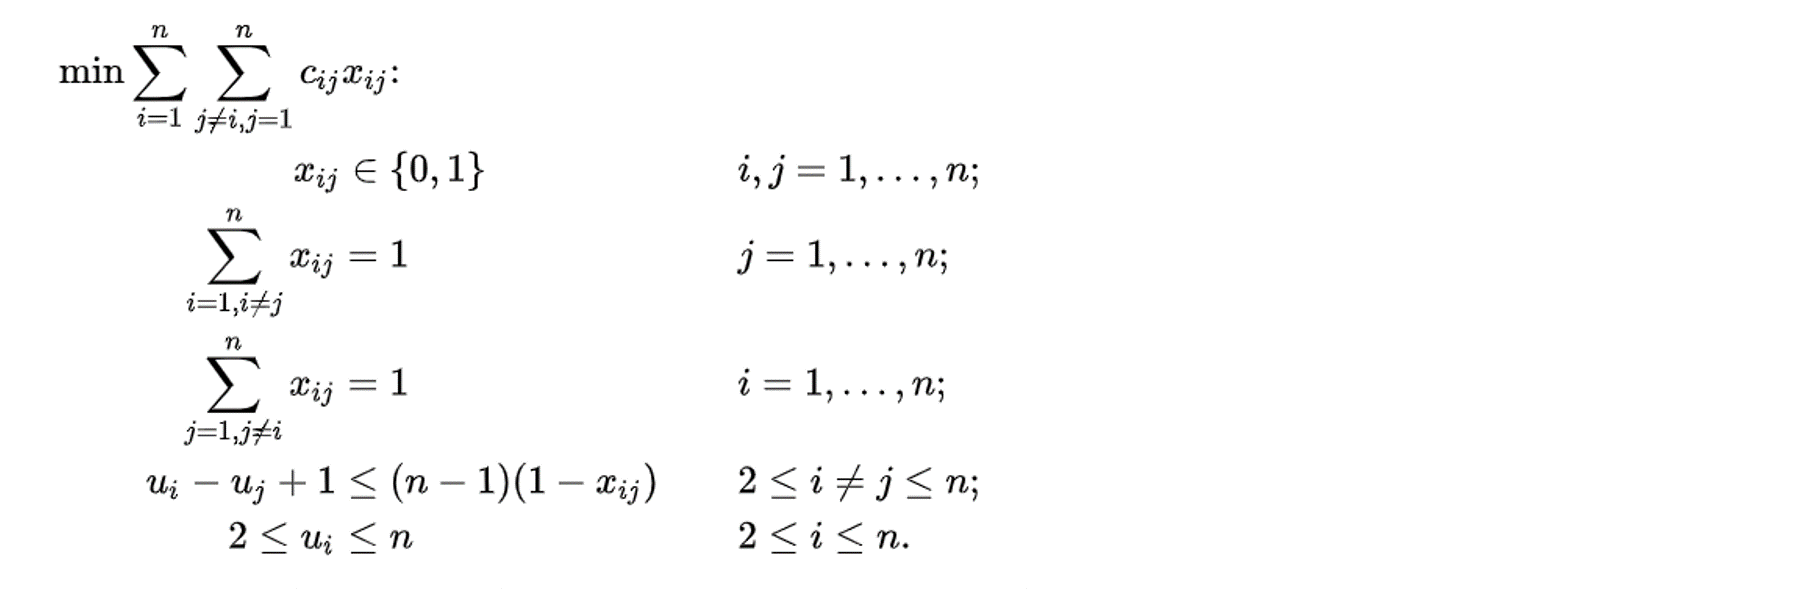


## Dantzig–Fulkerson–Johnson (DFJ)  formulation
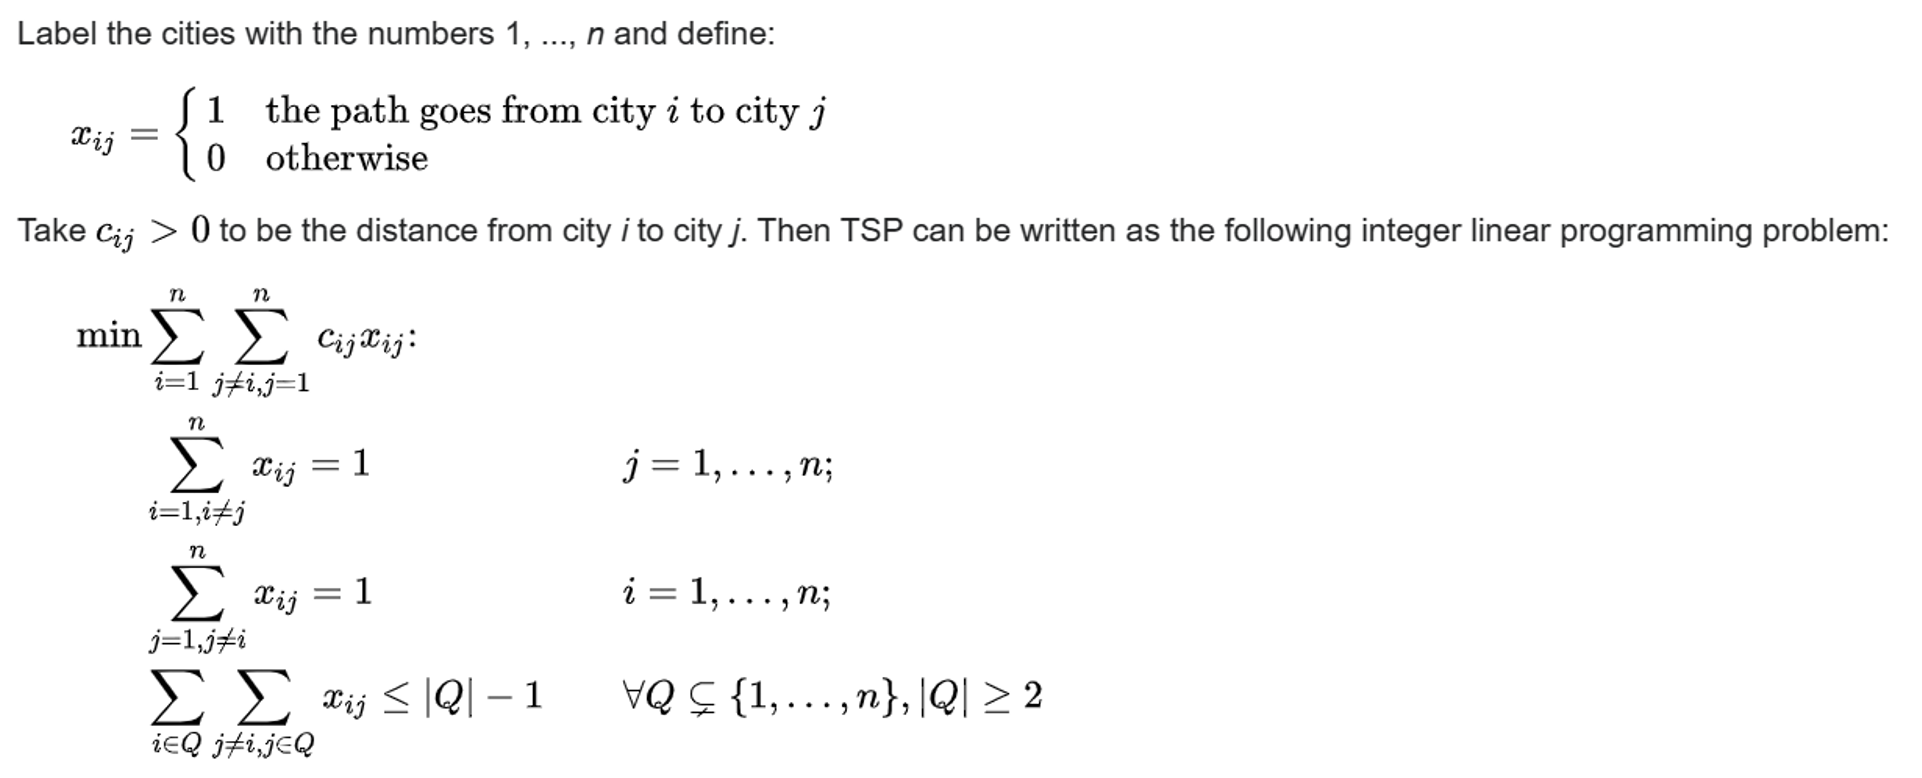

# Mathematical Modeling for VRP
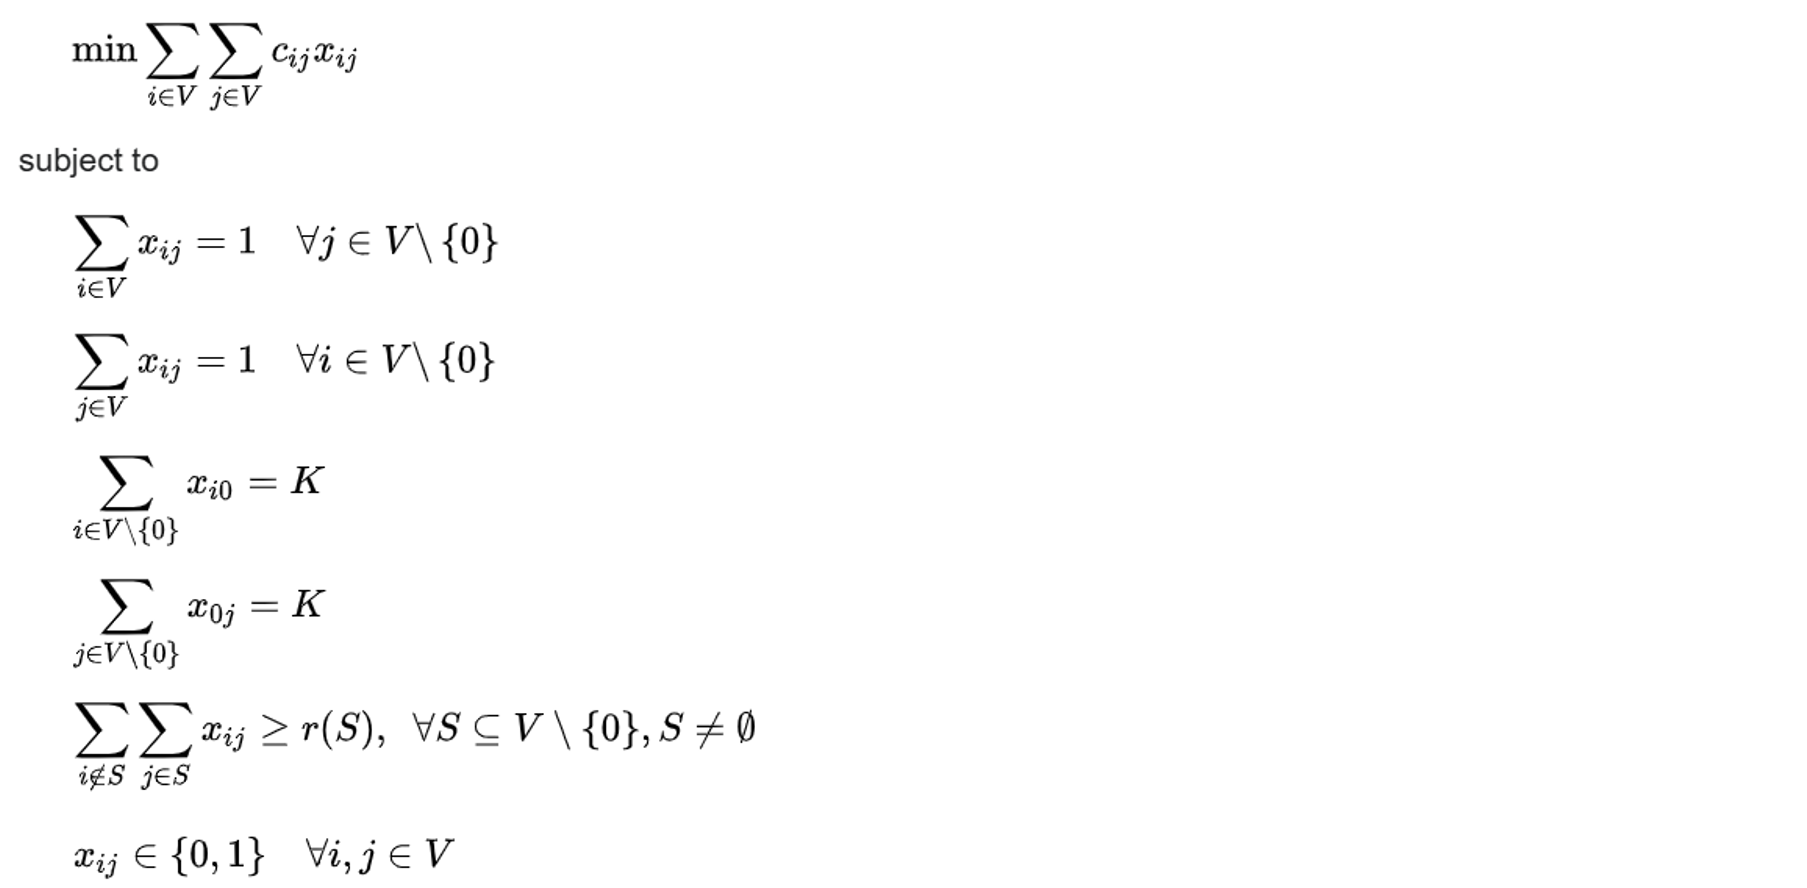




# <font color=red> In-class Exercise (30 extra points)</font>

## Design a Capacitated VRP greedy algorithm which can satisfy the following requirements.

### 1) each truck can delivery up to n (an assigned number) customers

### 2) balance customer numbers delived by each truck

### 3) improve the route of each truck to minimize distance


In [72]:
import random as rd 
import matplotlib.pyplot as plt
service_radius=5000
number_of_customers=50

colors = ['g','c','m','y','gray','orange']
# colors = []

# for i in range(100):
#     colors.append('#%06X' % rd.randint(0, 0xFFFFFF))
    
    
def setup ():
    plt.rcParams["figure.figsize"] = (10,10)
    x=[0] #put deport (start point) at the middle of service area
    y=[0]   
    for i in range (1,number_of_customers+1):
        x.append(int(rd.uniform(-service_radius,service_radius)))
        y.append(int(rd.uniform(-service_radius,service_radius)))
    return(x,y)

def show (x,y):
    plt.scatter(x[0],y[0], s=100, c='r')     
    for i in range (1,number_of_customers+1):
        plt.scatter(x[i],y[i], s=50, c='b')
        plt.annotate(i, (x[i], y[i]), xytext=(5,5), textcoords='offset points')
        
def visualize (route,color):
    show (x,y)
    for i in range (len(route)-1):
        plt.plot([x[route[i]],x[route[i+1]]],[y[route[i]],y[route[i+1]]],color)         
    
def objective(route):
    total_distance=0
    for i in range(len(route)-1):
        #print(route[i],"->", route[i+1],"distance:",abs(x[route[i]]-x[route[i+1]])+abs(y[route[i]]-y[route[i+1]]))
        total_distance+=abs(x[route[i]]-x[route[i+1]])+abs(y[route[i]]-y[route[i+1]])
    return(total_distance)

def greedy(routes):

    result = [0,0]
    for i in range (1,len(routes)-1):
        min_cost=999999999
        for j in range(1,len(result)):
            temp=result.copy()
            #print("this is temp route: ",temp)
            temp.insert(j,routes[i])

            if objective(temp)<min_cost:
                min_cost=objective(temp)
                best_location=j
        result.insert(best_location,routes[i])
        #print ("result is ",result)
    return(result)

x,y=setup()

routes :  [[0], [0], [0], [0], [0]] 

[[0, 1, 26, 24, 29, 8, 45, 9, 47, 16, 48, 31, 34], [0, 39, 2, 43, 44, 27, 3, 41, 6], [0, 17, 30, 19, 21, 4, 14, 28, 20, 42, 38, 40, 25], [0, 35, 32, 50, 18, 10, 12, 5, 23], [0, 15, 49, 37, 46, 13, 11, 7, 33, 36, 22]]
Distance before
30980
26552
30144
26112
28228
[[0, 1, 26, 24, 29, 8, 45, 9, 47, 16, 48, 31, 34, 0], [0, 39, 2, 43, 44, 27, 3, 41, 6, 0], [0, 17, 30, 19, 21, 4, 14, 28, 20, 42, 38, 40, 25, 0], [0, 35, 32, 50, 18, 10, 12, 5, 23, 0], [0, 15, 49, 37, 46, 13, 11, 7, 33, 36, 22, 0]]
Distance After
28070
26238
32758
26930
30370
Route 1: [0, 1, 26, 24, 29, 8, 45, 9, 47, 16, 48, 31, 34, 0]
Route 2: [0, 39, 2, 43, 44, 27, 3, 41, 6, 0]
Route 3: [0, 17, 30, 19, 21, 4, 14, 28, 20, 42, 38, 40, 25, 0]
Route 4: [0, 35, 32, 50, 18, 10, 12, 5, 23, 0]
Route 5: [0, 15, 49, 37, 46, 13, 11, 7, 33, 36, 22, 0]


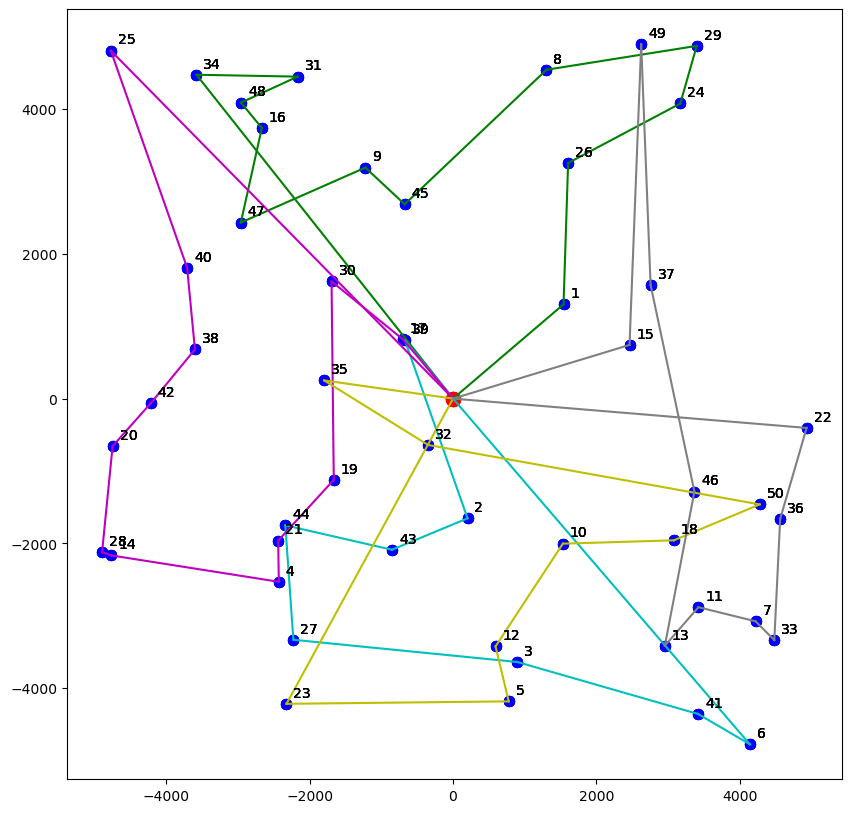

In [74]:
def multitruck(num_trucks,capacity):
    balance = (number_of_customers/num_trucks)+2
    # Initialize routes with depot [0, 0]
    routes = [[0] for _ in range(num_trucks)]
    print("routes : ",routes,'\n')
#     served = 0
    for i in range(1,number_of_customers + 1):
        #initiate var
        best_truck, best_pos = None, None
        min_cost = float('inf')
        #loop each truck
        for truck, route in enumerate(routes):
#             print("truck is:",truck+1,", route is:",route)
            for pos in range(1,len(route)+1):
                temp_route = route.copy()
                temp_route.insert(pos, i)
#                 print("pos is",pos,"customer is",i)
                cost = objective(temp_route)
                #compare minimum

#                 if cost < min_cost and len(routes[truck])-2<capacity:
#                     min_cost = cost
#                     best_truck, best_pos = truck, pos
                if cost < min_cost and len(routes[truck])<=balance and len(routes[truck])<=capacity-2:

                    min_cost = cost
                    best_truck, best_pos = truck, pos
               
#         print(len(routes))
        if best_pos is not None:
            routes[best_truck].insert(best_pos, i)
#         served+=1
        #print(routes)
    print(routes)
    for i in range(0,len(routes)):
        routes[i]= routes[i][0:(capacity+1)]
        routes[i].append(0)
    
    print("Distance before")
    for i in range(0,len(routes)):
        print(objective(routes[i]))
    print(routes)
    resultfinal = []
    #greedy each routes
    for i in routes:
        resultfinal.append(greedy(i))
    print("Distance After")
    for i in range(0,len(resultfinal)):
        print(objective(resultfinal[i]))
    return routes

# Call
num_trucks = 5
capacity = 100
result_routes = multitruck(num_trucks,capacity) 

# Visualize the routes
for i, route in enumerate(result_routes):
    print(f"Route {i + 1}: {route}")
#     print("Total Dist",i+1,"=",objective(route),'\n')
    visualize(route,colors[i])
plt.show()

# <font color=red> Reading for next Class</font>

# Local Search

#https://dm865.github.io/assets/dm865-tsp-ls-handout.pdf